In [37]:
import tensorflow as tf
import torch
import onnx
from onnx_tf.backend import prepare
from torchsummary import summary
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

from modules.model import *
from modules.interpolator import InterpolateSparse2d

In [38]:
model_dir = './weights/xfeat.pb'  # Path to the saved model directory
model = tf.saved_model.load(model_dir)


In [39]:
print("Available functions:")
for func in model.signatures:
    print(func)

Available functions:
serving_default


In [40]:
# Access the default serving function
infer = model.signatures['serving_default']

# Print input and output details
print("Inputs:")
for input_tensor in infer.inputs:
    print(f"{input_tensor.name}: {input_tensor.shape}")

print("Outputs:")
for output_tensor in infer.outputs:
    print(f"{output_tensor.name}: {output_tensor.shape}")

Inputs:
images:0: (None, 3, None, None)
unknown:0: (1,)
unknown_0:0: (1,)
unknown_1:0: (4, 1, 3, 3)
unknown_2:0: (4,)
unknown_3:0: (8, 4, 3, 3)
unknown_4:0: (8,)
unknown_5:0: (8, 8, 3, 3)
unknown_6:0: (8,)
unknown_7:0: (24, 8, 3, 3)
unknown_8:0: (24,)
unknown_9:0: (24, 1, 1, 1)
unknown_10:0: (24,)
unknown_11:0: (24, 24, 3, 3)
unknown_12:0: (24,)
unknown_13:0: (24, 24, 3, 3)
unknown_14:0: (24,)
unknown_15:0: (64, 24, 3, 3)
unknown_16:0: (64,)
unknown_17:0: (64, 64, 3, 3)
unknown_18:0: (64,)
unknown_19:0: (64, 64, 1, 1)
unknown_20:0: (64,)
unknown_21:0: (64, 64, 3, 3)
unknown_22:0: (64,)
unknown_23:0: (64, 64, 3, 3)
unknown_24:0: (64,)
unknown_25:0: (64, 64, 3, 3)
unknown_26:0: (64,)
unknown_27:0: (128, 64, 3, 3)
unknown_28:0: (128,)
unknown_29:0: (128, 128, 3, 3)
unknown_30:0: (128,)
unknown_31:0: (128, 128, 3, 3)
unknown_32:0: (128,)
unknown_33:0: (64, 128, 1, 1)
unknown_34:0: (64,)
unknown_35:0: ()
unknown_36:0: ()
unknown_37:0: (1,)
unknown_38:0: (1,)
unknown_39:0: (64, 64, 3, 3)
unk

In [41]:
import tensorflow as tf
import numpy as np

# Load SavedModel
model = tf.saved_model.load('./weights/xfeat.pb')

# Get the inference function from the model
infer = model.signatures["serving_default"]

im1 = cv2.imread('./assets/ref.png')
#im2 = cv2.imread('./assets/tgt2.png')

# Prepare the inputs
input_array_1 = im1.transpose(2, 0, 1).astype(np.float32)
input_array_1 = np.expand_dims(input_array_1, axis=0)
# input_array_2 = im2.transpose(2, 0, 1).astype(np.float32)
# input_array_2 = np.expand_dims(input_array_2, axis=0)

# Create batch
batch_size = 8
input_array_1 = np.concatenate([input_array_1 for _ in range(batch_size)], axis=0)
#input_array_2 = np.concatenate([input_array_2 for _ in range(batch_size)], axis=0)

print(f"Input shape: {input_array_1.shape}")
# Feed inputs to the model
inputs = {
    "images": tf.convert_to_tensor(input_array_1)  # Adjust name based on signature
    #"images1": tf.convert_to_tensor(input_array_2)   # Adjust name based on signature
}

# Run inference
output = infer(**inputs)

#print(output)

# Extract and print the output
output_tensor = output['feats'].numpy()  # Adjust name based on signature
print("Model output:", output_tensor)


Input shape: (8, 3, 600, 800)
Model output: [[[[ 2.45337415e+00  1.32957602e+00  2.08429527e+00 ...  1.95484209e+00
     2.55180788e+00  2.06618690e+00]
   [ 2.01832032e+00  1.67083669e+00  2.98804832e+00 ...  8.08490515e-01
     2.48507214e+00  9.99918997e-01]
   [ 2.21493220e+00  2.22979951e+00  3.59139228e+00 ... -1.13782048e-01
     1.45467710e+00  1.72696984e+00]
   ...
   [ 1.05374050e+00  2.27530718e+00  2.35342979e+00 ...  8.90227973e-01
     1.36938381e+00  1.57315159e+00]
   [ 2.55952740e+00  2.72404861e+00  3.03891420e+00 ...  1.68932009e+00
     1.52054882e+00  1.59569669e+00]
   [ 2.19075370e+00  1.55070949e+00  3.20730829e+00 ...  1.31913161e+00
     1.36556768e+00  1.46290481e+00]]

  [[-1.10642254e-01 -2.28955436e+00 -6.15225017e-01 ...  8.38207006e-02
     7.70402551e-02 -9.54310894e-02]
   [-6.19248629e-01 -2.74080801e+00 -9.43173051e-01 ...  2.52220333e-01
     6.06558323e-02  1.03924906e+00]
   [-4.59544778e-01 -2.75513458e+00 -6.39452338e-01 ...  7.89737344e-01
   

In [56]:
def tf_infer(image):
    # Load SavedModel
    model = tf.saved_model.load('./weights/xfeat.pb')

    # Get the inference function from the model
    infer = model.signatures["serving_default"]
    im1 = image
    #im2 = cv2.imread('./assets/tgt2.png')

    # Prepare the inputs
    input_array_1 = im1
    #input_array_1 = np.expand_dims(input_array_1, axis=0)
    # input_array_2 = im2.transpose(2, 0, 1).astype(np.float32)
    # input_array_2 = np.expand_dims(input_array_2, axis=0)

    # Create batch
    # batch_size = 
    # input_array_1 = np.concatenate([input_array_1 for _ in range(batch_size)], axis=0)
    #input_array_2 = np.concatenate([input_array_2 for _ in range(batch_size)], axis=0)

    print(f"Input shape: {input_array_1.shape}")
    # Feed inputs to the model
    inputs = {
        "images": tf.convert_to_tensor(input_array_1)  # Adjust name based on signature
        #"images1": tf.convert_to_tensor(input_array_2)   # Adjust name based on signature
    }

    # Run inference
    output = infer(**inputs)

    #print(output)

    # Extract and print the output
    #output_tensor = output['feats'].numpy()  # Adjust name based on signature
    #print("Model output:", output_tensor)
    
    feats = output['feats'].numpy()
    keypoints = output['keypoints'].numpy()
    heatmaps = output['heatmaps'].numpy()
    return feats,keypoints,heatmaps


In [43]:
# Validate the outputs of the psuedo-batched inputs

feats = output['feats'].numpy()
keypoints = output['keypoints'].numpy()
heatmaps = output['heatmaps'].numpy()

feats_0 = feats[0]
keypoints_0 = keypoints[0]
heatmaps_0 = heatmaps[0]
print(heatmaps)

valid = []
print(input_array_1.shape)
for i in range(1, input_array_1.shape[0]):
    valid.append(np.all(feats_0 == feats[i]))
    valid.append(np.all(keypoints_0 == keypoints[i]))
    valid.append(np.all(heatmaps_0 == heatmaps[i]))
print(f"equal: {valid}")

[[[[0.15650937 0.29295915 0.15366857 ... 0.08478482 0.08112149
    0.08037252]
   [0.1781009  0.29057983 0.2281861  ... 0.16443025 0.1519006
    0.14766504]
   [0.13201274 0.38662294 0.42028034 ... 0.19205843 0.18498418
    0.15754938]
   ...
   [0.25528982 0.20216376 0.23200265 ... 0.4305748  0.28718126
    0.1302902 ]
   [0.19578473 0.21145844 0.23555715 ... 0.24324048 0.19075175
    0.08843668]
   [0.15091088 0.17944227 0.19863133 ... 0.14519747 0.1328096
    0.07355581]]]


 [[[0.15650937 0.29295915 0.15366857 ... 0.08478482 0.08112149
    0.08037252]
   [0.1781009  0.29057983 0.2281861  ... 0.16443025 0.1519006
    0.14766504]
   [0.13201274 0.38662294 0.42028034 ... 0.19205843 0.18498418
    0.15754938]
   ...
   [0.25528982 0.20216376 0.23200265 ... 0.4305748  0.28718126
    0.1302902 ]
   [0.19578473 0.21145844 0.23555715 ... 0.24324048 0.19075175
    0.08843668]
   [0.15091088 0.17944227 0.19863133 ... 0.14519747 0.1328096
    0.07355581]]]


 [[[0.15650937 0.29295915 0.153668

In [44]:
def warp_corners_and_draw_matches(ref_points, dst_points, img1, img2):
    # Calculate the Homography matrix
    H, mask = cv2.findHomography(ref_points, dst_points, cv2.USAC_MAGSAC, 3.5, maxIters=1_000, confidence=0.999)
    mask = mask.flatten()

    # Get corners of the first image (image1)
    h, w = img1.shape[:2]
    corners_img1 = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=np.float32).reshape(-1, 1, 2)

    # Warp corners to the second image (image2) space
    warped_corners = cv2.perspectiveTransform(corners_img1, H)

    # Draw the warped corners in image2
    img2_with_corners = img2.copy()
    for i in range(len(warped_corners)):
        start_point = tuple(warped_corners[i-1][0].astype(int))
        end_point = tuple(warped_corners[i][0].astype(int))
        cv2.line(img2_with_corners, start_point, end_point, (0, 255, 0), 4)  # Using solid green for corners

    # Prepare keypoints and matches for drawMatches function
    keypoints1 = [cv2.KeyPoint(p[0], p[1], 5) for p in ref_points]
    keypoints2 = [cv2.KeyPoint(p[0], p[1], 5) for p in dst_points]
    matches = [cv2.DMatch(i,i,0) for i in range(len(mask)) if mask[i]]

    # Draw inlier matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2_with_corners, keypoints2, matches, None,
                                  matchColor=(0, 255, 0), flags=2)

    return img_matches

In [45]:
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = XFeatModel().to(dev).eval()

In [46]:
def parse_input(x):
		if len(x.shape) == 3:
			x = x[None, ...]

		if isinstance(x, np.ndarray):
			x = torch.tensor(x).permute(0,3,1,2)/255

		return x

In [47]:
def preprocess_tensor(x):
		""" Guarantee that image is divisible by 32 to avoid aliasing artifacts. """
		if isinstance(x, np.ndarray) and x.shape == 3:
			x = torch.tensor(x).permute(2,0,1)[None]
		x = x.to(dev).float()

		H, W = x.shape[-2:]
		_H, _W = (H//32) * 32, (W//32) * 32
		rh, rw = H/_H, W/_W

		x = F.interpolate(x, (_H, _W), mode='bilinear', align_corners=False)
		return x, rh, rw

In [48]:
def get_kpts_heatmap(kpts, softmax_temp = 1.0):
		scores = F.softmax(kpts*softmax_temp, 1)[:, :64]
		B, _, H, W = scores.shape
		heatmap = scores.permute(0, 2, 3, 1).reshape(B, H, W, 8, 8)
		heatmap = heatmap.permute(0, 1, 3, 2, 4).reshape(B, 1, H*8, W*8)
		return heatmap

In [49]:
def NMS(x, threshold = 0.05, kernel_size = 5):
		B, _, H, W = x.shape
		pad=kernel_size//2
		local_max = nn.MaxPool2d(kernel_size=kernel_size, stride=1, padding=pad)(x)
		pos = (x == local_max) & (x > threshold)
		if torch.onnx.is_in_onnx_export():
			if B != 1:
				raise ValueError('Error: NMS does not support batched mode in ONNX export.')
			return pos.nonzero()[None, ..., 2:].flip(-1)
		pos_batched = [k.nonzero()[..., 1:].flip(-1) for k in pos]

		pad_val = max([len(x) for x in pos_batched])
		pos = torch.zeros((B, pad_val, 2), dtype=torch.long, device=x.device)

		#Pad kpts and build (B, N, 2) tensor
		for b in range(len(pos_batched)):
			pos[b, :len(pos_batched[b]), :] = pos_batched[b]

		return pos

In [50]:
interpolator = InterpolateSparse2d('bicubic')

In [51]:
def detectAndCompute(x, top_k = None, detection_threshold=0.05):
		"""
			Compute sparse keypoints & descriptors. Supports batched mode.

			input:
				x -> torch.Tensor(B, C, H, W): grayscale or rgb image
				top_k -> int: keep best k features
			return:
				List[Dict]: 
					'keypoints'    ->   torch.Tensor(N, 2): keypoints (x,y)
					'scores'       ->   torch.Tensor(N,): keypoint scores
					'descriptors'  ->   torch.Tensor(N, 64): local features
		"""
		if top_k is None: top_k = top_k
		if detection_threshold is None: detection_threshold = detection_threshold
		x, rh1, rw1 = preprocess_tensor(x)

		B, _, _H1, _W1 = x.shape
        
		M1, K1, H1 = net(x)
		M1 = F.normalize(M1, dim=1)
		print(M1.shape)
		print(K1.shape)
		print(H1.shape)

		#Convert logits to heatmap and extract kpts
		K1h = get_kpts_heatmap(K1)
		mkpts = NMS(K1h, threshold=detection_threshold, kernel_size=5)

		#Compute reliability scores
		_nearest = InterpolateSparse2d('nearest')
		_bilinear = InterpolateSparse2d('bilinear')
		scores = (_nearest(K1h, mkpts, _H1, _W1) * _bilinear(H1, mkpts, _H1, _W1)).squeeze(-1)
		scores[torch.all(mkpts == 0, dim=-1)] = -1

		#Select top-k features
		idxs = torch.argsort(-scores)
		mkpts_x  = torch.gather(mkpts[...,0], -1, idxs)[:, :top_k]
		mkpts_y  = torch.gather(mkpts[...,1], -1, idxs)[:, :top_k]
		mkpts = torch.cat([mkpts_x[...,None], mkpts_y[...,None]], dim=-1)
		scores = torch.gather(scores, -1, idxs)[:, :top_k]

		#Interpolate descriptors at kpts positions
		feats = interpolator(M1, mkpts, H = _H1, W = _W1)

		#L2-Normalize
		feats = F.normalize(feats, dim=-1)

		#Correct kpt scale
		mkpts = mkpts * torch.tensor([rw1,rh1], device=mkpts.device).view(1, 1, -1)

		valid = scores > 0
		return [  
				   {'keypoints': mkpts[b][valid[b]],
					'scores': scores[b][valid[b]],
					'descriptors': feats[b][valid[b]]} for b in range(B) 
			   ]

In [52]:
def match(feats1, feats2, min_cossim = 0.82):

		cossim = feats1 @ feats2.t()
		cossim_t = feats2 @ feats1.t()
		
		_, match12 = cossim.max(dim=1)
		_, match21 = cossim_t.max(dim=1)

		idx0 = torch.arange(len(match12), device=match12.device)
		mutual = match21[match12] == idx0

		if min_cossim > 0:
			cossim, _ = cossim.max(dim=1)
			good = cossim > min_cossim
			idx0 = idx0[mutual & good]
			idx1 = match12[mutual & good]
		else:
			idx0 = idx0[mutual]
			idx1 = match12[mutual]

		return idx0, idx1

In [53]:
def match_xfeat(img1, img2, top_k = None, min_cossim = -1):
    """
        Simple extractor and MNN matcher.
        For simplicity it does not support batched mode due to possibly different number of kpts.
        input:
            img1 -> torch.Tensor (1,C,H,W) or np.ndarray (H,W,C): grayscale or rgb image.
            img2 -> torch.Tensor (1,C,H,W) or np.ndarray (H,W,C): grayscale or rgb image.
            top_k -> int: keep best k features
        returns:
            mkpts_0, mkpts_1 -> np.ndarray (N,2) xy coordinate matches from image1 to image2
    """
    if top_k is None: top_k = top_k
    img1 = parse_input(img1)
    img2 = parse_input(img2)

    out1 = detectAndCompute(img1, top_k=top_k)[0]
    out2 = detectAndCompute(img2, top_k=top_k)[0]

    print(out1)
    print(out2)
    idxs0, idxs1 = match(out1['descriptors'], out2['descriptors'], min_cossim=min_cossim )

    if torch.onnx.is_in_onnx_export():
        return out1['keypoints'][idxs0], out2['keypoints'][idxs1]
    return out1['keypoints'][idxs0].cpu().numpy(), out2['keypoints'][idxs1].cpu().numpy()

In [57]:

"""
	"XFeat: Accelerated Features for Lightweight Image Matching, CVPR 2024."
	https://www.verlab.dcc.ufmg.br/descriptors/xfeat_cvpr24/
"""

import numpy as np
import os
import torch
import torch.nn.functional as F
import tensorflow as tf

import tqdm

from modules.model import *
from modules.interpolator import InterpolateSparse2d

class XFeat(nn.Module):
	""" 
		Implements the inference module for XFeat. 
		It supports inference for both sparse and semi-dense feature extraction & matching.
	"""

	def __init__(self, weights = './weights/xfeat.pt', top_k = 4096, detection_threshold=0.05):
		super().__init__()
		self.dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
		self.net = XFeatModel().to(self.dev).eval()
		self.top_k = top_k
		self.detection_threshold = detection_threshold

		if weights is not None:
			if isinstance(weights, str):
				print('loading weights from: ' + weights)
				self.net.load_state_dict(torch.load(weights, map_location=self.dev))
			else:
				self.net.load_state_dict(weights)

		self.interpolator = InterpolateSparse2d('bicubic')

		#Try to import LightGlue from Kornia
		self.kornia_available = False
		self.lighterglue = None
		try:
			import kornia
			self.kornia_available=True
		except:
			pass


	@torch.inference_mode()
	def detectAndCompute(self, x, top_k = None, detection_threshold = None):
		"""
			Compute sparse keypoints & descriptors. Supports batched mode.

			input:
				x -> torch.Tensor(B, C, H, W): grayscale or rgb image
				top_k -> int: keep best k features
			return:
				List[Dict]: 
					'keypoints'    ->   torch.Tensor(N, 2): keypoints (x,y)
					'scores'       ->   torch.Tensor(N,): keypoint scores
					'descriptors'  ->   torch.Tensor(N, 64): local features
		"""
		if top_k is None: top_k = self.top_k
		if detection_threshold is None: detection_threshold = self.detection_threshold
		x, rh1, rw1 = self.preprocess_tensor(x)

		B, _, _H1, _W1 = x.shape
		
		#M1, K1, H1 = self.net(x)
		M1, K1, H1 = tf_infer(x)
		M1 = torch.from_numpy(M1)
		K1 = torch.from_numpy(K1)
		H1 = torch.from_numpy(H1)
		M1 = F.normalize(M1, dim=1)

		print(M1.shape)
		print(K1.shape)
		print(H1.shape)

		#Convert logits to heatmap and extract kpts
		K1h = self.get_kpts_heatmap(K1)
		mkpts = self.NMS(K1h, threshold=detection_threshold, kernel_size=5)

		#Compute reliability scores
		_nearest = InterpolateSparse2d('nearest')
		_bilinear = InterpolateSparse2d('bilinear')
		scores = (_nearest(K1h, mkpts, _H1, _W1) * _bilinear(H1, mkpts, _H1, _W1)).squeeze(-1)
		scores[torch.all(mkpts == 0, dim=-1)] = -1

		#Select top-k features
		idxs = torch.argsort(-scores)
		mkpts_x  = torch.gather(mkpts[...,0], -1, idxs)[:, :top_k]
		mkpts_y  = torch.gather(mkpts[...,1], -1, idxs)[:, :top_k]
		mkpts = torch.cat([mkpts_x[...,None], mkpts_y[...,None]], dim=-1)
		scores = torch.gather(scores, -1, idxs)[:, :top_k]

		#Interpolate descriptors at kpts positions
		feats = self.interpolator(M1, mkpts, H = _H1, W = _W1)

		#L2-Normalize
		feats = F.normalize(feats, dim=-1)

		#Correct kpt scale
		mkpts = mkpts * torch.tensor([rw1,rh1], device=mkpts.device).view(1, 1, -1)

		valid = scores > 0
		return [  
				   {'keypoints': mkpts[b][valid[b]],
					'scores': scores[b][valid[b]],
					'descriptors': feats[b][valid[b]]} for b in range(B) 
			   ]

	@torch.inference_mode()
	def match_xfeat(self, img1, img2, top_k = None, min_cossim = -1):
		"""
			Simple extractor and MNN matcher.
			For simplicity it does not support batched mode due to possibly different number of kpts.
			input:
				img1 -> torch.Tensor (1,C,H,W) or np.ndarray (H,W,C): grayscale or rgb image.
				img2 -> torch.Tensor (1,C,H,W) or np.ndarray (H,W,C): grayscale or rgb image.
				top_k -> int: keep best k features
			returns:
				mkpts_0, mkpts_1 -> np.ndarray (N,2) xy coordinate matches from image1 to image2
		"""
		if top_k is None: top_k = self.top_k
		img1 = self.parse_input(img1)
		img2 = self.parse_input(img2)
		out1 = self.detectAndCompute(img1, top_k=top_k)[0]
		out2 = self.detectAndCompute(img2, top_k=top_k)[0]

		idxs0, idxs1 = self.match(out1['descriptors'], out2['descriptors'], min_cossim=min_cossim )

		return out1['keypoints'][idxs0].cpu().numpy(), out2['keypoints'][idxs1].cpu().numpy()


	def preprocess_tensor(self, x):
		""" Guarantee that image is divisible by 32 to avoid aliasing artifacts. """
		if isinstance(x, np.ndarray) and len(x.shape) == 3:
			x = torch.tensor(x).permute(2,0,1)[None]
		x = x.to(self.dev).float()

		H, W = x.shape[-2:]
		_H, _W = (H//32) * 32, (W//32) * 32
		rh, rw = H/_H, W/_W

		x = F.interpolate(x, (_H, _W), mode='bilinear', align_corners=False)
		return x, rh, rw

	def get_kpts_heatmap(self, kpts, softmax_temp = 1.0):
		scores = F.softmax(kpts*softmax_temp, 1)[:, :64]
		B, _, H, W = scores.shape
		heatmap = scores.permute(0, 2, 3, 1).reshape(B, H, W, 8, 8)
		heatmap = heatmap.permute(0, 1, 3, 2, 4).reshape(B, 1, H*8, W*8)
		return heatmap

	def NMS(self, x, threshold = 0.05, kernel_size = 5):
		B, _, H, W = x.shape
		pad=kernel_size//2
		local_max = nn.MaxPool2d(kernel_size=kernel_size, stride=1, padding=pad)(x)
		pos = (x == local_max) & (x > threshold)
		pos_batched = [k.nonzero()[..., 1:].flip(-1) for k in pos]

		pad_val = max([len(x) for x in pos_batched])
		pos = torch.zeros((B, pad_val, 2), dtype=torch.long, device=x.device)

		#Pad kpts and build (B, N, 2) tensor
		for b in range(len(pos_batched)):
			pos[b, :len(pos_batched[b]), :] = pos_batched[b]

		return pos


	@torch.inference_mode()
	def match(self, feats1, feats2, min_cossim = 0.82):

		cossim = feats1 @ feats2.t()
		cossim_t = feats2 @ feats1.t()
		
		_, match12 = cossim.max(dim=1)
		_, match21 = cossim_t.max(dim=1)

		idx0 = torch.arange(len(match12), device=match12.device)
		mutual = match21[match12] == idx0

		if min_cossim > 0:
			cossim, _ = cossim.max(dim=1)
			good = cossim > min_cossim
			idx0 = idx0[mutual & good]
			idx1 = match12[mutual & good]
		else:
			idx0 = idx0[mutual]
			idx1 = match12[mutual]

		return idx0, idx1


	def parse_input(self, x):
		if len(x.shape) == 3:
			x = x[None, ...]

		if isinstance(x, np.ndarray):
			x = torch.tensor(x).permute(0,3,1,2)/255

		return x


loading weights from: ./weights/xfeat.pt


/var/folders/vr/8wl6wf991x56pnll55wlwcy40000gn/T/ipykernel_59573/4262223875.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch.load(weights,

Input shape: torch.Size([1, 3, 576, 800])
torch.Size([1, 64, 72, 100])
torch.Size([1, 65, 72, 100])
torch.Size([1, 1, 72, 100])
Input shape: torch.Size([1, 3, 576, 800])
torch.Size([1, 64, 72, 100])
torch.Size([1, 65, 72, 100])
torch.Size([1, 1, 72, 100])


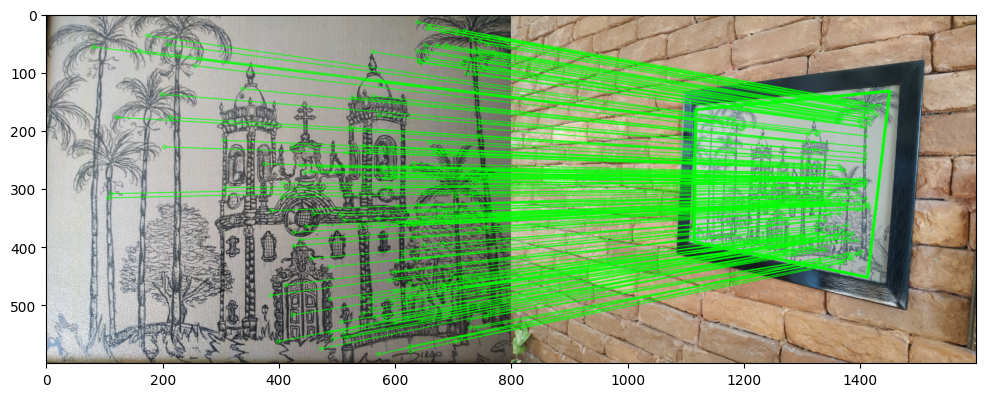

(<matplotlib.image.AxesImage at 0x308eacd90>, None)

In [58]:
#Use out-of-the-box function for extraction + MNN matching
im1 = cv2.imread('./assets/ref.png')
im2 = cv2.imread('./assets/tgt.png')

xfeat = XFeat()
#Use out-of-the-box function for extraction + MNN matching
mkpts_0, mkpts_1 = xfeat.match_xfeat(im1, im2, top_k = 4096)
# torch.Size([1, 64, 72, 100])
# torch.Size([1, 65, 72, 100])
# torch.Size([1, 1, 72, 100])
canvas = warp_corners_and_draw_matches(mkpts_0, mkpts_1, im1, im2)
plt.figure(figsize=(12,12))
plt.imshow(canvas[..., ::-1]), plt.show()

Input shape: (8, 3, 600, 800)
Input shape: (8, 3, 600, 800)
[[[[-3.21446109e+00  1.06836653e+00  1.12367690e+00 ... -2.95947456e+00
    -3.07135677e+00  2.08530039e-01]
   [-4.51775730e-01  5.22518039e-01 -2.06129694e+00 ... -7.58041739e-01
    -2.53988481e+00 -1.05020380e+00]
   [ 7.35427737e-01 -8.22416246e-01  2.07971978e+00 ... -4.02000237e+00
     3.19251806e-01 -3.94401288e+00]
   ...
   [-8.52319002e-01 -2.87400126e+00 -2.74970341e+00 ... -1.89214325e+00
    -2.22031760e+00 -8.21545243e-01]
   [-4.39790010e+00 -4.25734282e+00 -3.38758492e+00 ... -4.29075432e+00
    -2.94641805e+00 -1.73132074e+00]
   [-4.50305605e+00 -1.79365027e+00 -5.42020273e+00 ... -2.15451694e+00
    -3.63031149e+00 -3.84234548e+00]]

  [[-9.66647148e-01 -5.03342032e-01  2.70845962e+00 ... -4.54307461e+00
    -1.43067408e+00 -1.66855073e+00]
   [ 6.06172204e-01 -6.00730419e-01 -4.07822275e+00 ... -2.92754531e+00
    -2.55833292e+00  1.59545571e-01]
   [ 1.07694781e+00 -2.03840852e+00 -4.69524264e-01 ... -5.

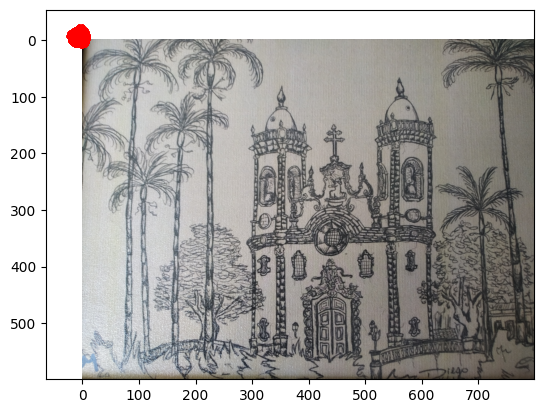

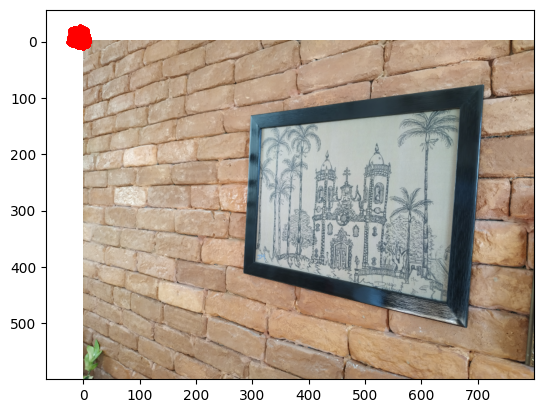

In [7]:
# Assuming output tensors contain keypoints
def extract_keypoints(keypoints):
    # Convert output tensor to keypoints
    #keypoints = output_tensor[0]  # Adjust this depending on your model's output format
    keypoints = np.array(keypoints).reshape(-1, 2)  # Reshape to [num_keypoints, 2]
    return keypoints

im1 = cv2.imread('./assets/ref.png')
im2 = cv2.imread('./assets/tgt.png')
# Extract keypoints
feats_0,keypoints_0,heatmaps_0 = tf_infer(im1)
feats_1,keypoints_1,heatmaps_1 = tf_infer(im2)
print(keypoints_0)
print(keypoints_1)
mkpts_0 = extract_keypoints(keypoints_0)
mkpts_1 = extract_keypoints(keypoints_1)

# Debugging: Print keypoints
print(f"Keypoints in image 1: {mkpts_0}")
print(f"Keypoints in image 2: {mkpts_1}")


# Plot the keypoints
def plot_keypoints(image, keypoints):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=10, c='red', marker='o')
    plt.show()

plot_keypoints(im1, mkpts_0)
plot_keypoints(im2, mkpts_1)
